## Q1: How many bikes were stolen per year? per month?
## Q2: How is the value per catagories? per area?

In [2]:
import pandas as pd
df = pd.read_csv('./bike_data/finish_list.csv', index_col=0)

In [3]:
df

,crime_time_start_date,crime_time_start_hour,crime_time_end_date,crime_time_end_hour,lor,amount_of_damage,type_of_bicycle,offense/crime,district,district_region,planning_area
0,2020-01-01,0,2020-01-01,0,1401046,300,Bicycle,Bicycle Theft,01 - Mitte,Wedding Zentrum,Nordufer
1,2020-01-01,0,2020-01-01,0,1100416,100,Men's Bicycle,Bicycle Theft,01 - Mitte,Brunnenstraße Süd,Arkonaplatz
2,2020-01-01,0,2020-01-01,0,4501150,50,Men's Bicycle,Bicycle Theft,04 - Charlottenburg-Wilmersdorf,Volkspark Wilmersdorf,Wilhelmsaue
3,2020-01-01,1,2020-01-01,12,2400623,264,Men's Bicycle,Bicycle Theft,02 - Friedrichshain-Kreuzberg,Karl-Marx-Allee Süd,Andreasviertel
4,2020-01-01,11,2020-01-01,15,1100309,950,Men's Bicycle,Bicycle Theft,01 - Mitte,Alexanderplatz,Oranienburger Straße
...,...,...,...,...,...,...,...,...,...,...,...
94132,2024-06-19,9,2024-06-19,19,1100416,750,Women's Bicycle,Bicycle Theft,01 - Mitte,Brunnenstraße Süd,Arkonaplatz
94133,2024-06-19,18,2024-06-19,21,3601243,2000,Men's Bicycle,Bicycle Theft,03 - Pankow,Prenzlauer Berg Nord,Rodenbergstraße
94134,2024-06-19,13,2024-06-19,21,9501736,1198,Women's Bicycle,Bicycle Theft,09 - Treptow-Köpenick,Friedrichshagen,Hirschgarten
94135,2024-06-19,18,2024-06-19,21,3601245,1079,Mountain Bike,Basement and Attic Burglary,03 - Pankow,Prenzlauer Berg Nord,Ostseestraße


In [4]:
#set crime_time_start_date and crime_time_end_date columns as date_time type
df['crime_time_start_date'] = pd.to_datetime(df['crime_time_start_date'])
df['crime_time_end_date'] = pd.to_datetime(df['crime_time_end_date'])

In [5]:
# add year and month columns
df['year'] = df['crime_time_start_date'].dt.year
df['month'] = df['crime_time_start_date'].dt.month
df.head(10)

,crime_time_start_date,crime_time_start_hour,crime_time_end_date,crime_time_end_hour,lor,amount_of_damage,type_of_bicycle,offense/crime,district,district_region,planning_area,year,month
0,2020-01-01,0,2020-01-01,0,1401046,300,Bicycle,Bicycle Theft,01 - Mitte,Wedding Zentrum,Nordufer,2020,1
1,2020-01-01,0,2020-01-01,0,1100416,100,Men's Bicycle,Bicycle Theft,01 - Mitte,Brunnenstraße Süd,Arkonaplatz,2020,1
2,2020-01-01,0,2020-01-01,0,4501150,50,Men's Bicycle,Bicycle Theft,04 - Charlottenburg-Wilmersdorf,Volkspark Wilmersdorf,Wilhelmsaue,2020,1
3,2020-01-01,1,2020-01-01,12,2400623,264,Men's Bicycle,Bicycle Theft,02 - Friedrichshain-Kreuzberg,Karl-Marx-Allee Süd,Andreasviertel,2020,1
4,2020-01-01,11,2020-01-01,15,1100309,950,Men's Bicycle,Bicycle Theft,01 - Mitte,Alexanderplatz,Oranienburger Straße,2020,1
5,2020-01-01,11,2020-01-01,17,4500939,299,Mountain Bike,Bicycle Theft,04 - Charlottenburg-Wilmersdorf,Halensee,Eisenzahnstraße,2020,1
6,2020-01-01,13,2020-01-01,17,3300514,399,Men's Bicycle,Bicycle Theft,03 - Pankow,Blankenburg/Heinersdorf/Märchenland,Blankenburg,2020,1
7,2020-01-01,16,2020-01-01,18,3300514,625,Men's Bicycle,Bicycle Theft,03 - Pankow,Blankenburg/Heinersdorf/Märchenland,Blankenburg,2020,1
8,2020-01-01,15,2020-01-01,20,4501147,999,Bicycle,Bicycle Theft,04 - Charlottenburg-Wilmersdorf,Volkspark Wilmersdorf,Leon-Jessel-Platz,2020,1
9,2020-01-01,19,2020-01-01,20,8100206,1600,Men's Bicycle,Bicycle Theft,08 - Neukölln,Neuköllner Mitte/Zentrum,Flughafenstraße,2020,1


In [6]:
#compare amount of stolen bikes in 2020, 2021, 2022, 2023
count_per_year = df.groupby(['year'])['lor'].count()
count_per_year_month = df.groupby(['year','month'])['lor'].count()


<Axes: title={'center': 'Stolen Bikes between 2020.01 - 2024.06'}, xlabel='year'>

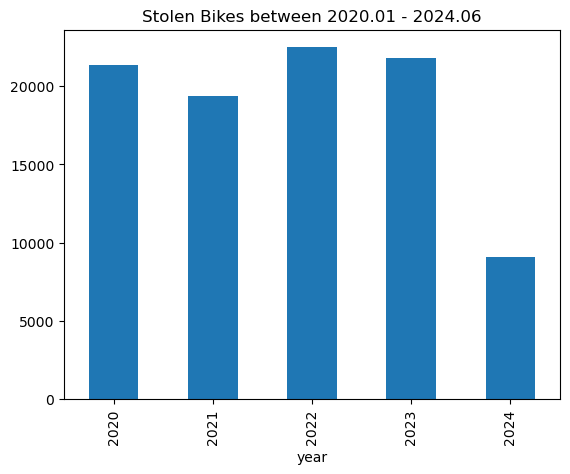

In [7]:
count_per_year.plot(kind='bar', title='Stolen Bikes between 2020.01 - 2024.06')

<Axes: title={'center': 'Stolen Bikes between 2020.01 - 2024.06'}, xlabel='year,month'>

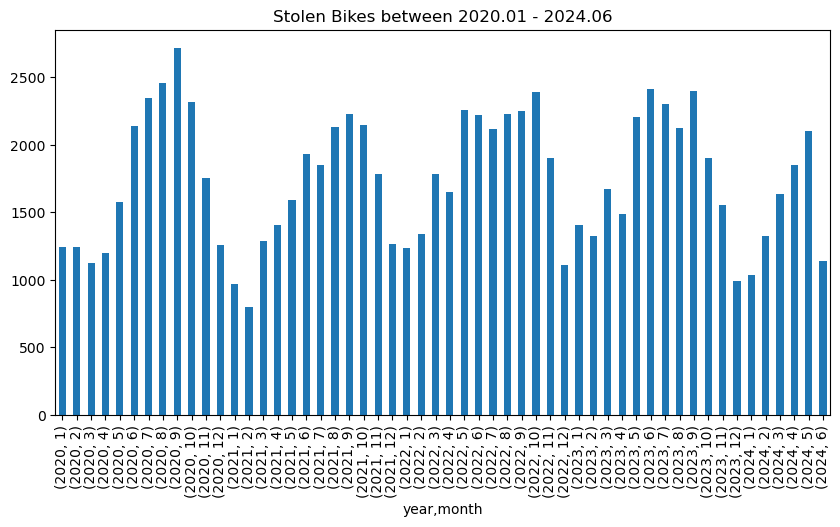

In [8]:
count_per_year_month.plot(kind='bar', figsize=(10,5), title='Stolen Bikes between 2020.01 - 2024.06')

<Axes: title={'center': 'Stolen Bikes between 2020.01 - 2024.06'}, xlabel='district'>

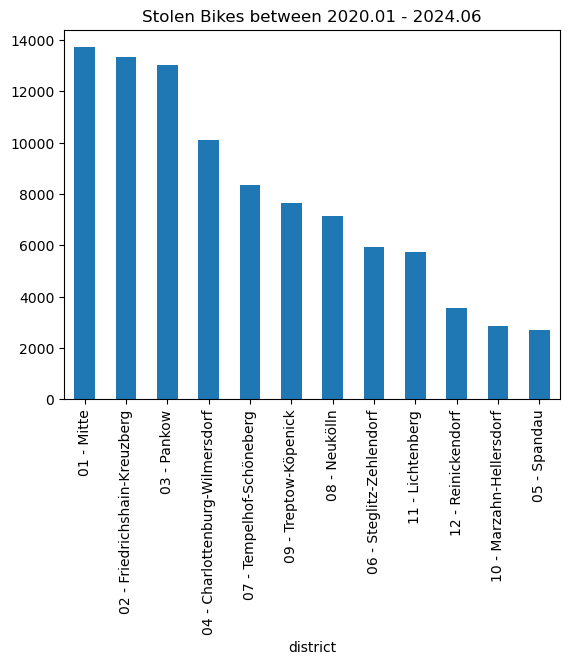

In [9]:
df.groupby('district')['lor'].count().sort_values(ascending=False).plot(kind='bar', title='Stolen Bikes between 2020.01 - 2024.06')

<Axes: xlabel='district'>

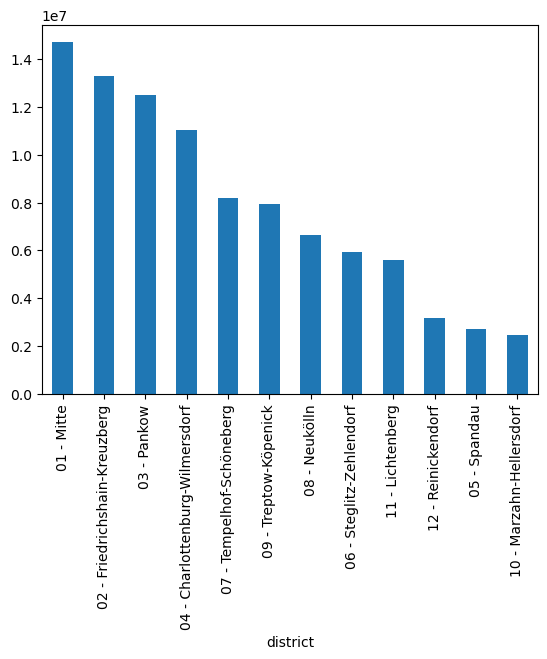

In [17]:
df.groupby(['district'])['amount_of_damage'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: title={'center': 'Stolen Bikes between 2020.01 - 2024.06'}, xlabel='district,year'>

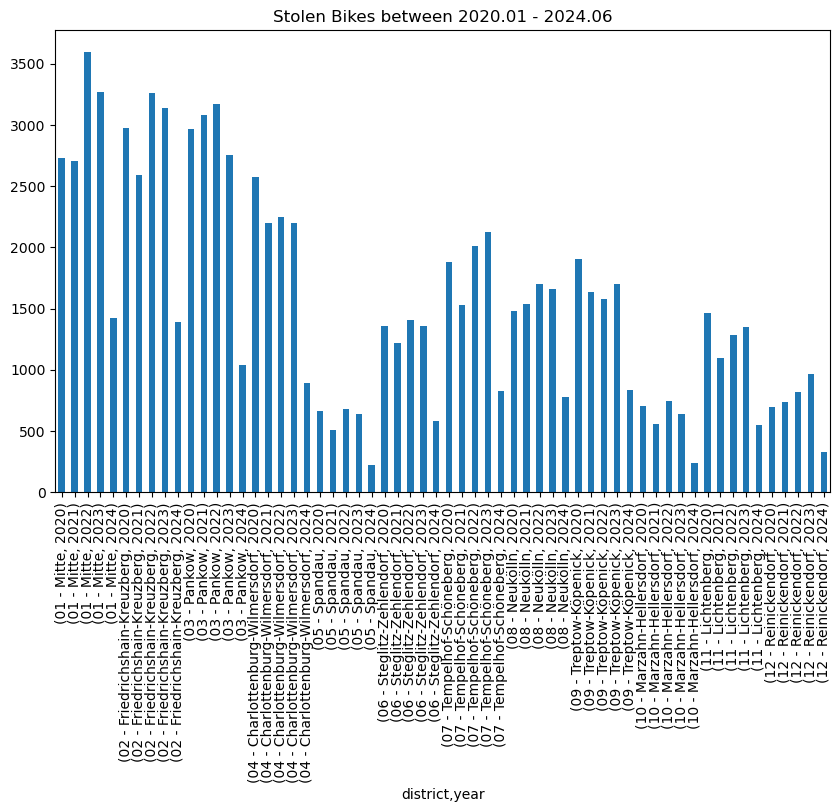

In [14]:
df.groupby(['district','year'])['lor'].count().plot(kind='bar', title='Stolen Bikes between 2020.01 - 2024.06', figsize=(10,6))

<Axes: xlabel='type_of_bicycle'>

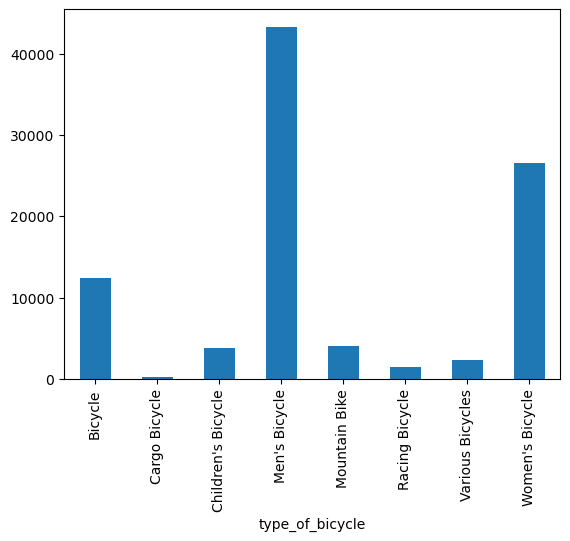

In [25]:
df.groupby(['type_of_bicycle'])['type_of_bicycle'].count().plot(kind='bar')

In [26]:
df.groupby(['type_of_bicycle'])['amount_of_damage'].agg(['sum','mean','median','min','max'])

,sum,mean,median,min,max
type_of_bicycle,,,,,
Bicycle,14754398,1187.190055,780.0,0,10000
Cargo Bicycle,660342,3351.989848,3000.0,0,10000
Children's Bicycle,1490516,393.587536,385.0,0,3800
Men's Bicycle,45257881,1045.772142,790.0,0,10000
Mountain Bike,3493095,852.390190,559.0,0,8400
Racing Bicycle,1654021,1112.320780,850.0,0,10000
Various Bicycles,4478188,1915.392643,1274.5,0,10000
Women's Bicycle,22317990,841.394533,600.0,0,10000


<Axes: ylabel='Frequency'>

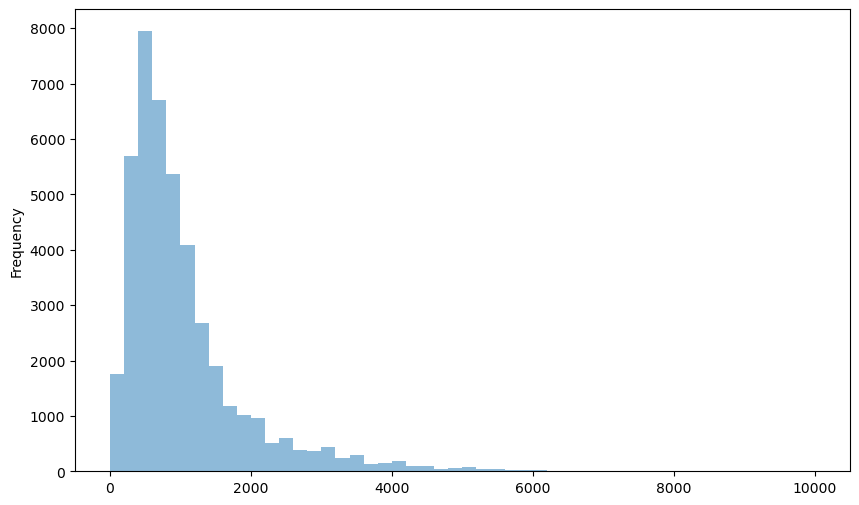

In [33]:
df.groupby(['type_of_bicycle']).get_group("Men's Bicycle")['amount_of_damage'].plot.hist(bins=50, alpha=0.5, figsize=(10,6))

<Axes: >

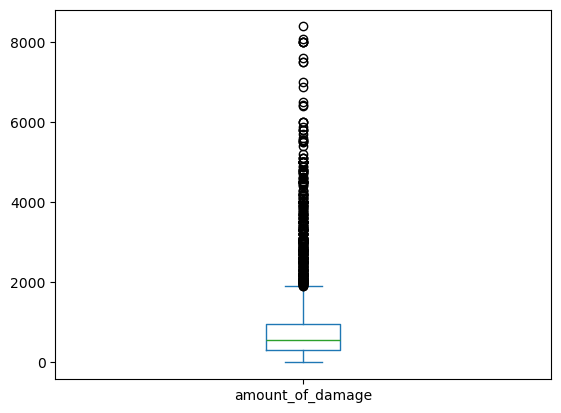

In [29]:
df.groupby(['type_of_bicycle']).get_group("Mountain Bike")['amount_of_damage'].plot.box()